In [320]:
import pandas as pd
import os

ot_odr_filename = os.path.join(".", "OT_ODR.csv.bz2")
ot_odr_df = pd.read_csv(ot_odr_filename, compression="bz2", sep=";")
longueur_ot_odr_df = len(ot_odr_df)

equipements_filename = os.path.join(".", 'EQUIPEMENTS.csv')
equipements_df = pd.read_csv(equipements_filename, sep=";")


In [321]:
equipements_df.tail()


,EQU_ID,MODELE,CONSTRUCTEUR,MOTEUR
4882,E00271009,MD023,C007,MT021
4883,E00341892,MD063,C007,MT023
4884,E00331551,MD005,C000,MT040
4885,E00373890,MD021,C011,MT0-1
4886,E00365136,MD032,C006,MT016


In [322]:
ot_odr_df.tail()

,OT_ID,ODR_ID,ODR_LIBELLE,TYPE_TRAVAIL,DUREE_TRAVAIL,SYSTEM_N1,SYSTEM_N2,SYSTEM_N3,EQU_ID,DATE_OT,KILOMETRAGE,SIG_ORGANE,SIG_CONTEXTE,SIG_OBS,LIGNE
506553,OT000405952,OM000506539,REMPLACEMENT D'UN FEU DE RECUL,ELECTRICITE,0.04,EQUIPEMENT ELECTRIQUE,ECLAIRAGE-SIGNALISATION,ECLAIRAGE-SIGNALISATION EXT,E00040793,2019-09-30 20:38:09,296005.373397,ECLAIRAGE FEUX EXTERIEURS,ARRIERE/EXTERIEUR/DROIT,CASSE,L0283
506554,OT000405953,OM000506546,REMPLACEMENT D'UN ECLAIRAGE EXT,MECANIQUE,0.75,EQUIPEMENT ELECTRIQUE,ECLAIRAGE-SIGNALISATION,ECLAIRAGE-SIGNALISATION EXT,E00274690,2019-09-30 21:21:20,153050.080050,ECLAIRAGE FEUX EXTERIEURS,ARRIERE/LATERAL,CASSE,L0116
506555,OT000405954,OM000506536,REMPLACEMENT D'UN PASSE SANS CONTACT,EQUIPEMENT EMBARQUE,0.03,EQUIPEMENT EMBARQUE,TELEBILLETIQUE,PASSE SANS CONTACT,E00256452,2019-09-30 21:39:29,175063.182439,AVTT,AVANT/PORTE,INTERMITTENT,L0134
506556,OT000405955,OM000506545,REMPLACEMENT D'UNE LAMPE DE FEU DE GABARIT,ELECTRICITE,0.04,EQUIPEMENT ELECTRIQUE,ECLAIRAGE-SIGNALISATION,ECLAIRAGE-SIGNALISATION EXT,E00006122,2019-09-30 21:55:28,437053.614263,ECLAIRAGE FEUX EXTERIEURS,LATERAL/HAUT/GAUCHE,NE FONCTIONNE PAS,L0270
506557,OT000405956,OM000506547,REMPLACEMENT DE LA CASSETTE ENCREUSE D'UN VALI...,EQUIPEMENT EMBARQUE,0.03,EQUIPEMENT EMBARQUE,TELEBILLETIQUE,VALIDEUR MAGNETIQUE,E00315330,2019-09-30 23:43:42,83269.095630,AVTT,POSTE CONDUITE/AVANT,NE FONCTIONNE PAS,L0047


# Normaliser le texte

### Supprimer les caractères spéciaux

In [323]:
import unicodedata

def Replace_accents(word):
    try:
        word = unicodedata.normalize('NFD', word).encode('ascii', 'ignore').decode('utf-8')
    except:
        pass
    return word


def Delete_special_caractere(word):
    word = Replace_accents(word)
    try:
        word = word.replace('\\', '_').replace('/', '_').replace('-', '_').replace("'", ' ').replace('"', ' ').replace('`', ' ').replace('!', ' ').replace('@', ' ').replace('#', ' ').replace('$', ' ').replace('%', ' ').replace('^', ' ').replace('&', ' ').replace('*', ' ').replace('(', ' ').replace(')', ' ').replace('[', ' ').replace(']', ' ').replace('{', ' ').replace('}', ' ').replace('<', ' ').replace('>', ' ').replace('~', ' ').replace(':', ' ').replace(';', ' ').replace('.', ' ').replace(',', ' ').replace('?', ' ').replace('+', ' ').replace('=', ' ').replace('|', ' ').replace('\\', ' ').replace('\n', ' ').replace('\r', ' ')
    except:
        pass
    return word


In [324]:
ot_odr_df['SIG_ORGANE'].value_counts()

SIG_ORGANE
ECLAIRAGE FEUX EXTERIEURS    189559
CLIGNOTANTS/ DETRESSE         38986
PARE-CHOCS                    33191
RETROVISEUR                   25005
PORTE                         23043
                              ...  
TACHYGRAPHE                       2
LUBRIMATIC                        1
COLMATAGE.F.AIR                   1
PILE BTSAM                        1
ISSUE SEC.                        1
Name: count, Length: 116, dtype: int64

In [325]:
var_cat = ['ODR_LIBELLE', 'TYPE_TRAVAIL',
           'SYSTEM_N1', 'SYSTEM_N2', 'SYSTEM_N3', 
           'SIG_ORGANE', 'SIG_CONTEXTE', 'SIG_OBS', 'LIGNE']
for var in var_cat:
    ot_odr_df[var] = ot_odr_df[var].astype('category')

ot_odr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506558 entries, 0 to 506557
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   OT_ID          506558 non-null  object  
 1   ODR_ID         506558 non-null  object  
 2   ODR_LIBELLE    506558 non-null  category
 3   TYPE_TRAVAIL   506558 non-null  category
 4   DUREE_TRAVAIL  506558 non-null  float64 
 5   SYSTEM_N1      506558 non-null  category
 6   SYSTEM_N2      506558 non-null  category
 7   SYSTEM_N3      506558 non-null  category
 8   EQU_ID         506558 non-null  object  
 9   DATE_OT        506558 non-null  object  
 10  KILOMETRAGE    506557 non-null  float64 
 11  SIG_ORGANE     506558 non-null  category
 12  SIG_CONTEXTE   506558 non-null  category
 13  SIG_OBS        506558 non-null  category
 14  LIGNE          506558 non-null  category
dtypes: category(9), float64(2), object(4)
memory usage: 29.7+ MB


### PyAgrum

In [326]:
!pip install pyAgrum
import pyAgrum as gum

rb_projet =  gum.BayesNet("Projet")

# Creation d'un noeud

In [327]:
def Create_noeud(nom_du_noeud, ot_odr_df):
    Nombre_element = ot_odr_df[nom_du_noeud].value_counts()
    va = gum.LabelizedVariable(nom_du_noeud, nom_du_noeud, len(Nombre_element))
    i = 0
    for liste in ot_odr_df[nom_du_noeud].unique():
        liste = Delete_special_caractere(liste)
        try:
            va.changeLabel(i, str(liste))
        except gum.DuplicateElement as e:
            i -= 1
            print(f"Erreur de duplication dans le noeud '{nom_du_noeud}' pour la valeur : {liste}")
        i += 1
    return va

### Création du noeud de SIG_ORGANE

In [328]:
va_SIG_ORGANE = Create_noeud('SIG_ORGANE',ot_odr_df)


### Création du noeud de SYSTEM_N1

In [329]:
va_SYSTEM_N1 = Create_noeud('SYSTEM_N1',ot_odr_df)

### Création du noeud de SYSTEM_N2

In [330]:
va_SYSTEM_N2 = Create_noeud('SYSTEM_N2',ot_odr_df)

### Création du noeud de SYSTEM_N3

In [331]:
va_SYSTEM_N3 = Create_noeud('SYSTEM_N3',ot_odr_df)

### Création du noeud de TYPE_TRAVAIL

In [332]:
va_TYPE_TRAVAIL = Create_noeud('TYPE_TRAVAIL',ot_odr_df)

### Création du noeud de DUREE_TRAVAIL

In [333]:
va_DUREE_TRAVAIL = Create_noeud('DUREE_TRAVAIL',ot_odr_df)

### Création du noeud de ODR_LIBELLE

In [334]:
va_ODR_LIBELLE = Create_noeud('ODR_LIBELLE',ot_odr_df)

Erreur de duplication dans le noeud 'ODR_LIBELLE' pour la valeur : REMPLACEMENT D UNE GIROUETTE GRAPHIQUE LATERALE AV


## Creation du réseau

In [335]:
for va in [va_SIG_ORGANE,va_SYSTEM_N1,va_SYSTEM_N2,va_SYSTEM_N3,va_TYPE_TRAVAIL,va_DUREE_TRAVAIL,va_ODR_LIBELLE]:
    rb_projet.add(va)

## Cration des fixations

In [336]:
rb_projet.addArc("SIG_ORGANE","SYSTEM_N1")

rb_projet.addArc("SYSTEM_N1","SYSTEM_N2")
rb_projet.addArc("SYSTEM_N2","SYSTEM_N3")

rb_projet.addArc("SYSTEM_N3","ODR_LIBELLE")
rb_projet.addArc("SYSTEM_N2","ODR_LIBELLE")
rb_projet.addArc("SYSTEM_N1","ODR_LIBELLE")


rb_projet.addArc("ODR_LIBELLE","DUREE_TRAVAIL")
rb_projet.addArc("ODR_LIBELLE","TYPE_TRAVAIL")



# Affichage

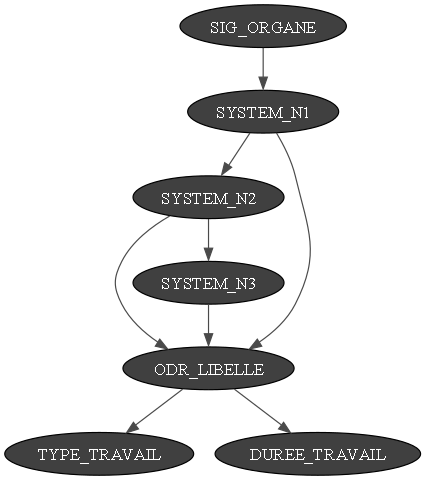

In [337]:
import pyAgrum.lib.ipython as gnb

gnb.showBN(rb_projet)

# Calcul des probabilite

In [338]:
def Create_Probabilite(df,element,all_element):
    longueur_df = len(df)
    count_element = []
    for liste in all_element:
        if liste in df[element].unique():
            count_element.append(len(df.loc[df[element] == liste]) / longueur_df)
        else:
            count_element.append(0)
    return count_element

### Calcul des probabilité de SIG_ORGANE

In [339]:


rb_projet.cpt("SIG_ORGANE")[:] = Create_Probabilite(ot_odr_df,"SIG_ORGANE",ot_odr_df["SIG_ORGANE"].unique())

rb_projet.cpt("SIG_ORGANE")


(pyAgrum.Potential<double>@00000232AF6DD0A0) 
  SIG_ORGANE                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

### Calcul des probabilité de SYSTEM_N1 en fonction de SIG_ORGANE

In [340]:
for liste_SIG in ot_odr_df['SIG_ORGANE'].unique():
    ot_odf_SIG_ORANE = ot_odr_df.loc[ot_odr_df['SIG_ORGANE'] == liste_SIG]
    liste_SIG = Delete_special_caractere(liste_SIG)

    rb_projet.cpt("SYSTEM_N1")[{"SIG_ORGANE":liste_SIG}] = Create_Probabilite(ot_odf_SIG_ORANE,"SYSTEM_N1",ot_odr_df["SYSTEM_N1"].unique())

rb_projet.cpt("SYSTEM_N1")

(pyAgrum.Potential<double>@00000232AF6DCFA0) 
      ||  SYSTEM_N1                                                                                        |
SIG_OR||EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|DIVERS   |
------||---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
GLACE_|| 0.9122  | 0.0648  | 0.0090  | 0.0008  | 0.0057  | 0.0000  | 0.0025  | 0.0008  | 0.0041  | 0.0000  |
KLAXON|| 0.1170  | 0.8578  | 0.0023  | 0.0000  | 0.0000  | 0.0069  | 0.0023  | 0.0000  | 0.0138  | 0.0000  |
VOITUR|| 0.2984  | 0.1254  | 0.1062  | 0.0326  | 0.0268  | 0.0905  | 0.2126  | 0.0179  | 0.0893  | 0.0004  |
PARE_C|| 0.7831  | 0.1978  | 0.0111  | 0.0004  | 0.0004  | 0.0002  | 0.0058  | 0.0002  | 0.0011  | 0.0000  |
SECURI|| 0.7463  | 0.1915  | 0.0000  | 0.0323  | 0.0025  | 0.0075  | 0.0050  | 0.0050  | 0.0100  | 0.0000  |
VOLANT|| 0.3020  | 0.0503  | 0.5361  | 0.0000  | 0.0041  | 0.0340  | 0.0122  | 0.0

### Calcul des probabilité de SYSTEM_N2 en fonction de SYSTEM_N1

In [341]:
for liste_N1 in ot_odr_df['SYSTEM_N1'].unique():
    ot_odf_SYSTEM_N1 = ot_odr_df.loc[ot_odr_df['SYSTEM_N1'] == liste_N1]
    liste_N1 = Delete_special_caractere(liste_N1)

    rb_projet.cpt("SYSTEM_N2")[{"SYSTEM_N1":liste_N1}] = Create_Probabilite(ot_odf_SYSTEM_N1,"SYSTEM_N2",ot_odr_df["SYSTEM_N2"].unique())
rb_projet.cpt("SYSTEM_N2")

(pyAgrum.Potential<double>@00000232AF6DE0C0) 
      ||  SYSTEM_N2                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
SYSTEM||VITRAGE  |ECLAIRAGE|EQUIPEMEN|ELEMENT C|PORTE    |INFORMATI|VENTILATI|LIAISON A|FREIN D E|ACCESSOIR|MOTEUR TH|DEPOLLUTI|CHASSIS  |FREIN PRI|BOITE DE |ARTICULAT|CIRCUIT D|TRANSMISS|CLIMATISA|CIRCUIT D|AMENAGEME|CIRCUIT D|CIRCUIT D|REFROIDIS|CIRCUIT D|CIRCUIT D|CIRCUIT D|CHAUFFAGE|CIRCUIT D|FREIN DE |_        |POSTE DE |ACCESSIBI|INDICATEU|CIRCUIT D|AIDE A L |STOCKAGE |CIRCUIT D|SECURITE |TELEBILLE|MAINTENAN|ENERGIE T|MOTEUR EL|CIRCUIT D|FREIN SEC|
------||---------|---------|--------

### Calcul des probabilité de SYSTEM_N3 en fonction de SYSTEM_N2

In [342]:
for liste_N2 in ot_odr_df['SYSTEM_N2'].unique():
    ot_odf_SYSTEM_N2 = ot_odr_df.loc[ot_odr_df['SYSTEM_N2'] == liste_N2]
    liste_N2 = Delete_special_caractere(liste_N2)
    rb_projet.cpt("SYSTEM_N3")[{"SYSTEM_N2":liste_N2}] = Create_Probabilite(ot_odf_SYSTEM_N2,"SYSTEM_N3",ot_odr_df["SYSTEM_N3"].unique())
rb_projet.cpt("SYSTEM_N3")

(pyAgrum.Potential<double>@00000232C98F24C0) 
      ||  SYSTEM_N3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

# Affichage

### Affichage Tableau

In [377]:
def afficher_probabilites_tableau(sig_organe):
    # Définir la valeur choisie pour SIG_ORGANE
    rb_projet.cpt("SIG_ORGANE")[{"SIG_ORGANE": sig_organe}] = 1.0
    colonnes = ot_odr_df['SYSTEM_N1'].unique()
    # Calculer la probabilité conditionnelle pour SYSTEM_N1
    proba_system_n1 = rb_projet.cpt("SYSTEM_N1")[{"SIG_ORGANE": sig_organe}]

    # Déterminer la longueur maximale des noms de colonnes
    longueur_max = max(len(colonne) for colonne in colonnes)

    # Afficher l'en-tête du tableau
    print(f"| {'Variable':<{longueur_max}} | Probabilité |")
    print(f"+{'-' * (longueur_max + 2)}+-------------+")

    # Afficher les lignes du tableau avec les noms de colonnes et les probabilités
    for colonne, probabilite in zip(colonnes, proba_system_n1):
        print(f"| {colonne:<{longueur_max}} | {probabilite:.4f}      |")

    # Afficher la ligne de séparation du tableau
    print(f"+{'-' * (longueur_max + 2)}+-------------+")

sig_organe_choisi = "ECLAIRAGE FEUX EXTERIEURS"
afficher_probabilites_tableau(sig_organe_choisi)

| Variable                   | Probabilité |
+----------------------------+-------------+
| EQUIPEMENT DE CARROSSERIE  | 0.0123      |
| EQUIPEMENT ELECTRIQUE      | 0.9860      |
| EQUIPEMENT CHASSIS         | 0.0002      |
| EQUIPEMENT EMBARQUE        | 0.0004      |
| EQUIPEMENT CLIMATIQUE      | 0.0002      |
| EQUIPEMENT DE FREINAGE     | 0.0001      |
| EQUIPEMENT DE MOTORISATION | 0.0006      |
| EQUIPEMENT DE TRANSMISSION | 0.0000      |
| EQUIPEMENT PNEUMATIQUE     | 0.0001      |
| DIVERS                     | 0.0000      |
+----------------------------+-------------+


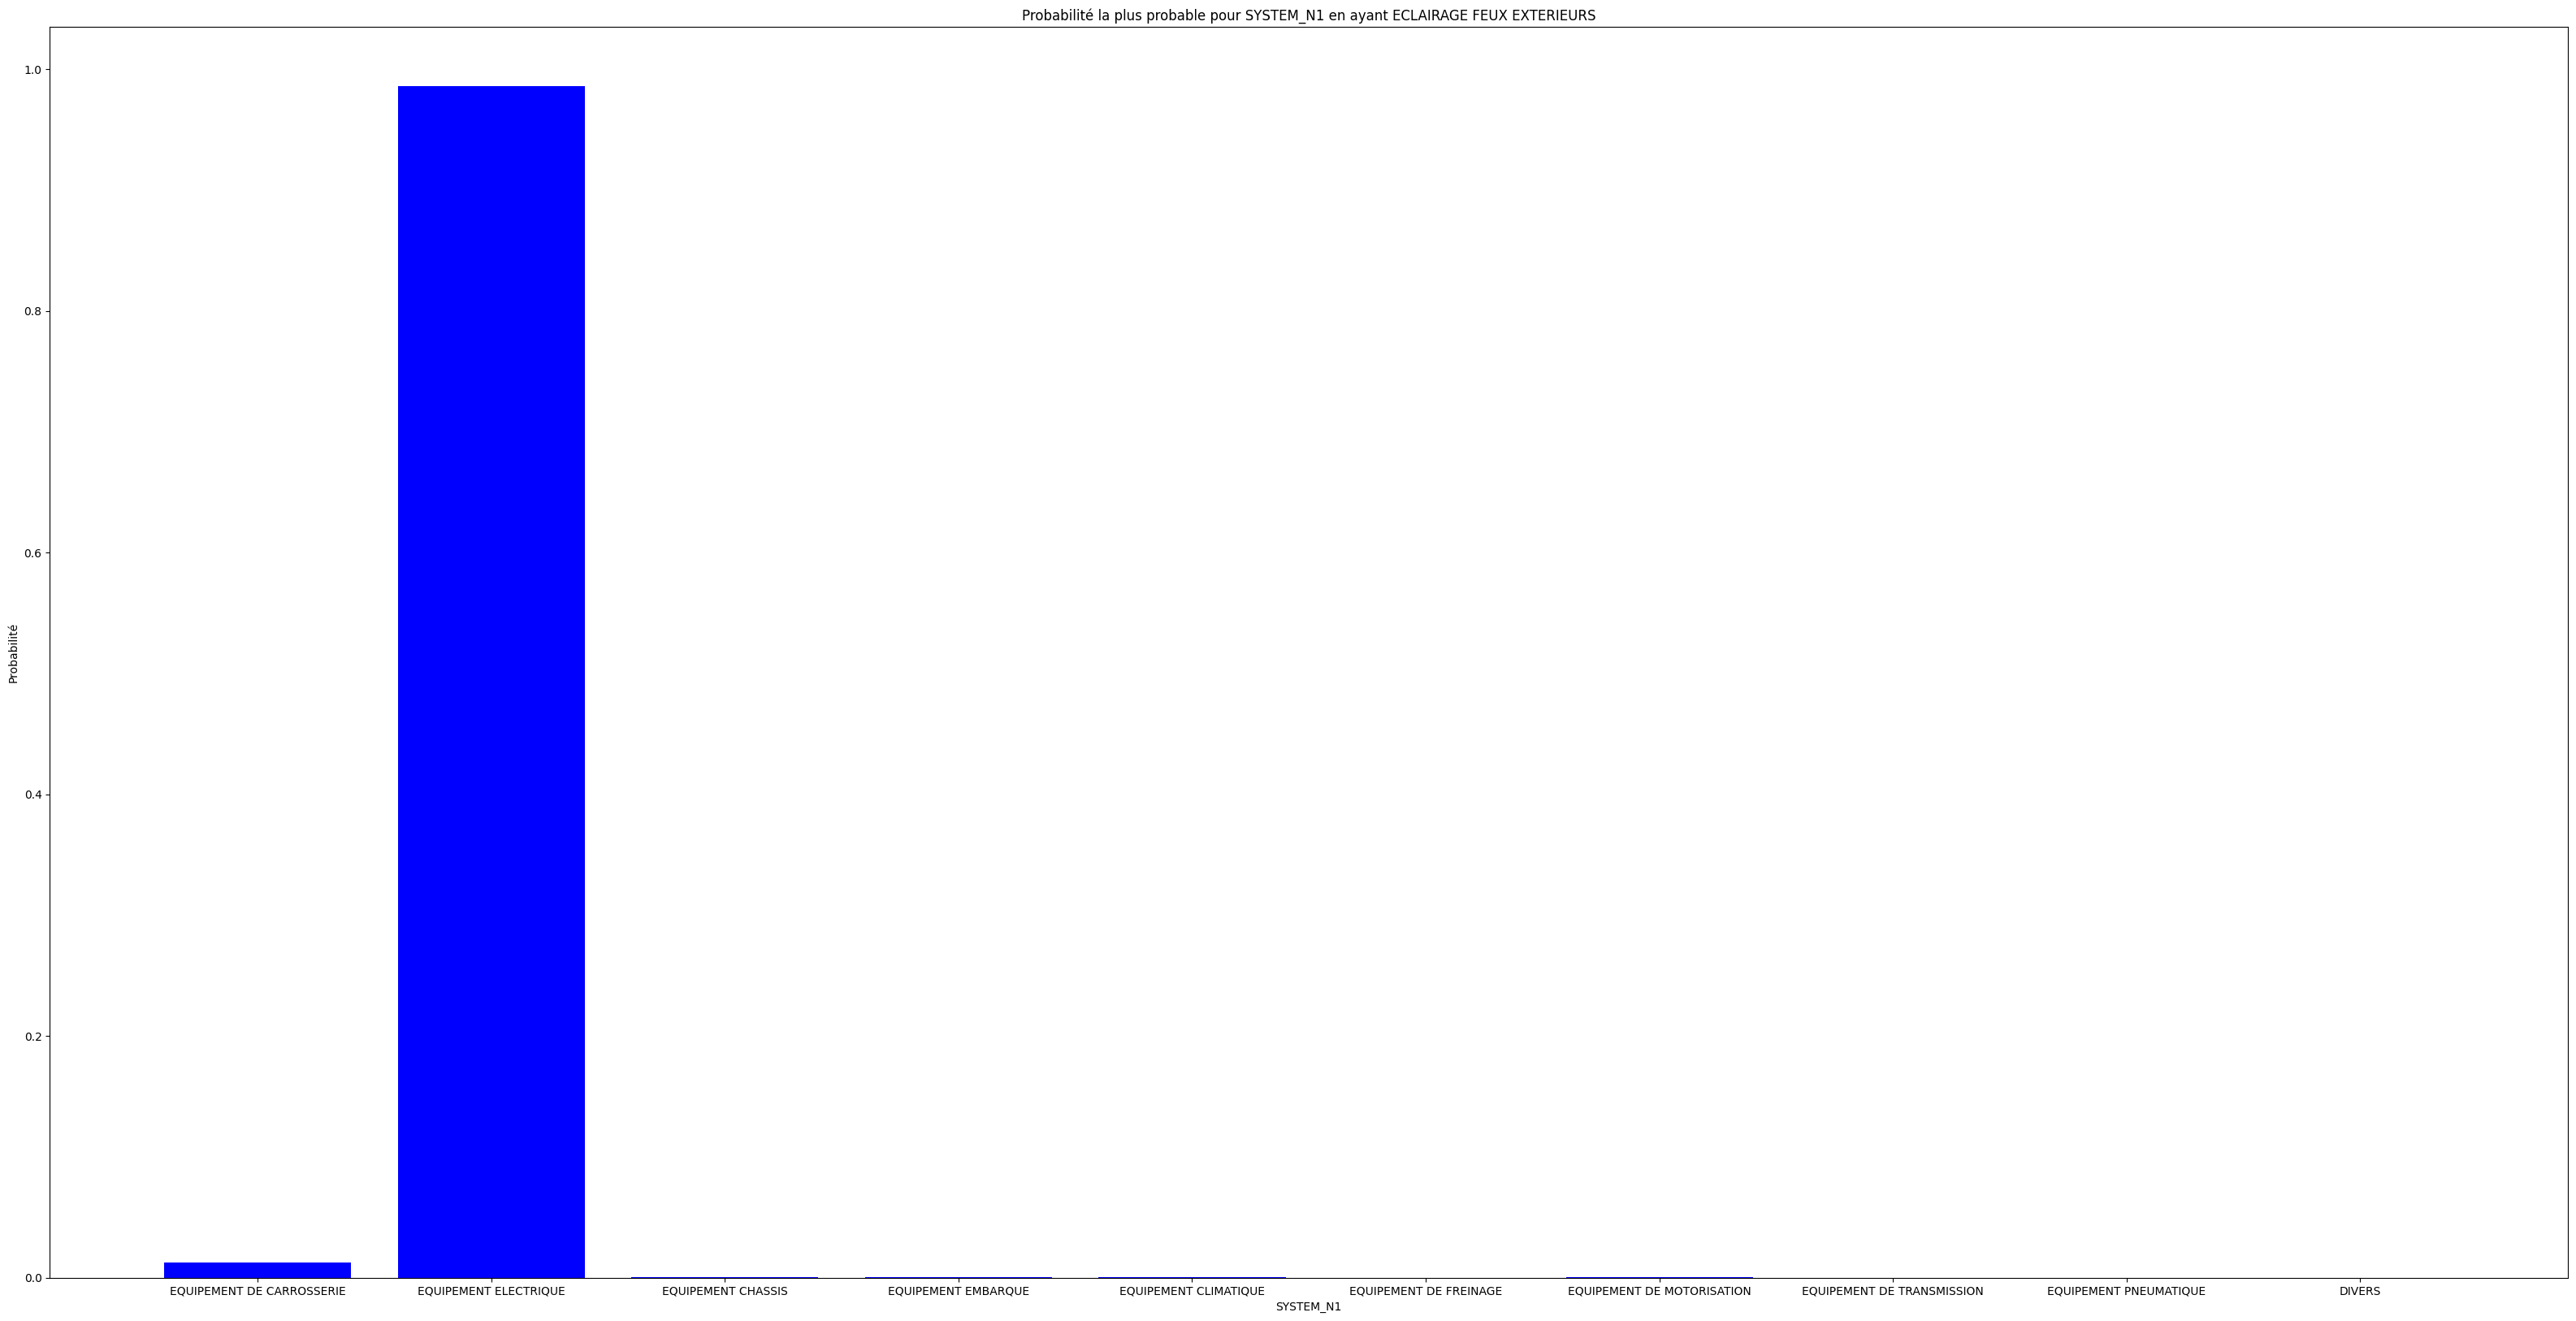

In [378]:
import matplotlib.pyplot as plt

def afficher_probabilites(sig_organe):
    # Définir la valeur choisie pour SIG_ORGANE
    rb_projet.cpt("SIG_ORGANE")[{"SIG_ORGANE": sig_organe}] = 1.0
    colonne = ot_odr_df['SYSTEM_N1'].unique()
    # Calculer la probabilité conditionnelle pour SYSTEM_N1
    proba_system_n1 = rb_projet.cpt("SYSTEM_N1")[{"SIG_ORGANE": sig_organe}]

    # Afficher la probabilité pour SYSTEM_N1 avec une taille de figure plus grande
    plt.figure(figsize=(40, 20))
    plt.bar(colonne, proba_system_n1, color='blue')
    plt.title(str("Probabilité la plus probable pour SYSTEM_N1 en ayant " + sig_organe_choisi))
    plt.xlabel("SYSTEM_N1")
    plt.ylabel("Probabilité")
    plt.show()
    

sig_organe_choisi = "ECLAIRAGE FEUX EXTERIEURS"
afficher_probabilites(sig_organe_choisi)
